# Python Web crawler of IMDB data Part 2:


## Extraction, data cleaning, and basic exploratory data analysis of 1936-2017 IMDB film data with sample including metascore data

## Web crawler for extracting IMDB data

In [4]:
#import requests library
import requests

#import the get module for requesting web content
from requests import get

#import bs4 library for extracting the data from the HTML code
from bs4 import BeautifulSoup

#import libraries to provide different amounts of waiting time between URL requests by Python
from time import time
from time import sleep
from random import randint

from IPython.core.display import clear_output

from warnings import warn

warn("Warning Simulation")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Warning Simulation


In [5]:
#Set up the number of pages in which data will be extracted from each year: i.e., first 5 pages
page_range = [str(i) for i in range(1,11)]

#Set up the film release date parameter range from the IMDB site: namely, the 87 year period of 1930 to 2017
year_range = [str(i) for i in range(1930,2018)]

In [6]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [7]:
#web crawler script:

#Create empty lists to contain the data that will be extracted from the IMDB site
genres = []
lengths = []
names = []
year_released = []
imdb_ratings = []
metascores = []
n_votes = []



#Initialize monitoring of the web crawler loop
start_t = time()
requests = 0

#Implement loop for each year in the range of 1938 to 2018
for year in year_range:

    # For each page from 1-10 for each given year
    for page in page_range:

        #implement a URL get request 
        response = get('http://www.imdb.com/search/title?release_date=' + year + 
        '&sort=num_votes,desc&page=' + page, headers = headers)

        #Pause the loop at pseudo-random intervals
        sleep(randint(8,15))

        # Monitor the get requests
        requests += 1
        elapsed_t = time() - start_t
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_t))
        clear_output(wait = True)

        #Show a warning if there is a non-200 status error
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        #Stop the loop if the # of requests is larger than was requested/specified
        if requests > 5000:
            warn('Number of requests was greater than expected.')  
            break 

        #Use the bs4 libary to Pparse the HTML content of the URL request
        page_html = BeautifulSoup(response.text, 'html.parser')

        # On each webpage, select the data for each of the 50 films
        films = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For each movie of these 50
        for film in films:
            # If the movie has a Metascore, then:
            if film.find('div', class_ = 'ratings-metascore') is not None:

                #iterate and extract data for the year the film was released
                y = film.h3.find('span', class_ = 'lister-item-year').text
                #append these data to the year_released list
                year_released.append(y)

                #iterate on the film names
                n = film.h3.a.text
                names.append(n)

                #iterate on genres
                g = film.find('span', class_ = 'genre').text
                #assign to g as a slice to get only the name of genre (i.e., delete first 2 characters)
                g = g[1:]
                #Multiple genres are listed for some films, with commas in between 
                #Thus, split the genres by comma, and then only keep the first element before the first comma
                g = g.split(',')[0]
                #Before appending to genres list, delete any empty space trailing after the actual genre name
                g = g.strip()
                #Having done the needed data cleaning, append the data to the genres list
                genres.append(g)

                #itereate on film lengths
                l = film.find('span', class_='runtime').text
                #slice the data to keep only the characters that actually contain the numeric data
                l = l[:3]
                #convert the film lengths data from string to integer
                l2 = int(l)
                #append the data to the lengths list
                lengths.append(l2)

                #iterate on IMDB ratings
                i = float(film.strong.text)
                imdb_ratings.append(i)

                #number of IMDB votes
                v = film.find('span', attrs = {'name':'nv'})['data-value']
                n_votes.append(int(v))

                # Scrape the Metascore
                m_score = film.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

Request:880; Frequency: 0.08162046445304263 requests/s


## Import data via Pandas, and perform data cleaning

In [3]:
#Import data analysis libraries to be able to merge the various lists into a dataframe
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [9]:
imdb_data = pd.DataFrame({'name':names,
                         'year': year_released,
                         'length': lengths,
                         'genre':genres,
                         'imdb_rating':imdb_ratings,
                         'n_votes':n_votes,
                         'metascore':metascores})
#Sanity check: inspect the data imported into the dataframe, to make sure it looks correct
imdb_data

name        year  length  \
0                                        The Blue Angel      (1930)     104   
1                                        The Blue Angel      (1930)     104   
2                                        The Blue Angel      (1930)     104   
3                                        The Blue Angel      (1930)     104   
4                                        The Blue Angel      (1930)     104   
5                                        The Blue Angel      (1930)     104   
6                                        The Blue Angel      (1930)     104   
7                                        The Blue Angel      (1930)     104   
8                                        The Blue Angel      (1930)     104   
9                                        The Blue Angel      (1930)     104   
10                                   I Was Born, But...      (1932)     100   
11                                   I Was Born, But...      (1932)     100   
12                                   I Was Born, But...      (1932)     100   
13                                   I Was Born, But...      (1932)     100   
14                                   I Was Born, But...      (1932)     100   
15                                   I Was Born, But...      (1932)     100   
16                                   I Was Born, But...      (1932)     100   
17                                   I Was Born, But...      (1932)     100   
18                                   I Was Born, But...      (1932)     100   
19                                   I Was Born, But...      (1932)     100   
20                                            King Kong      (1933)     100   
21                                      The Son of Kong      (1933)      70   
22                                            King Kong      (1933)     100   
23                                      The Son of Kong      (1933)      70   
24                                            King Kong      (1933)     100   
25                                      The Son of Kong      (1933)      70   
26                                            King Kong      (1933)     100   
27                                      The Son of Kong      (1933)      70   
28                                            King Kong      (1933)     100   
29                                      The Son of Kong      (1933)      70   
...                                                 ...         ...     ...   
20730                                              Coco  (I) (2017)     105   
20731                              Beauty and the Beast      (2017)     129   
20732                    Jumanji: Welcome to the Jungle      (2017)     119   
20733                                Kong: Skull Island      (2017)     118   
20734                                   Alien: Covenant      (2017)     122   
20735  Pirates of the Caribbean: Dead Men Tell No Tales      (2017)     129   
20736                       Kingsman: The Golden Circle      (2017)     141   
20737                    War for the Planet of the Apes      (2017)     140   
20738                              The Greatest Showman      (2017)     105   
20739                           The Fate of the Furious      (2017)     136   
20740                                              Life  (I) (2017)     104   
20741                      Murder on the Orient Express      (2017)     114   
20742                                Ghost in the Shell      (2017)     107   
20743                                         Lady Bird      (2017)      94   
20744                  King Arthur: Legend of the Sword      (2017)     126   
20745                                        Wind River      (2017)     107   
20746                            The Hitman's Bodyguard      (2017)     118   
20747                                         The Mummy      (2017)     110   
20748                                           Mother!      (2017)     121   
20749                 

In [10]:
#show the data types of each column
imdb_data.dtypes

name            object
year            object
length           int64
genre           object
imdb_rating    float64
n_votes          int64
metascore        int64
dtype: object

In [11]:
#Show all unique year data points from the dataframe
imdb_data['year'].unique()

array(['(1930)', '(1932)', '(1933)', '(1934)', '(1936)', '(1937)',
       '(1938)', '(1939)', '(1940)', '(1941)', '(1942)', '(1943)',
       '(1944)', '(1946)', '(1947)', '(1948)', '(1949)', '(1950)',
       '(1951)', '(1952)', '(1953)', '(1954)', '(1955)', '(1956)',
       '(1957)', '(1958)', '(1959)', '(1960)', '(1961)', '(1962)',
       '(1963)', '(1964)', '(1965)', '(1966)', '(1967)', '(1968)',
       '(1969)', '(1970)', '(1971)', '(1972)', '(1973)', '(1974)',
       '(1975)', '(1976)', '(1977)', '(1978)', '(1979)', '(1980)',
       '(1981)', '(I) (1981)', '(1982)', '(1983)', '(1984)', '(1985)',
       '(1986)', '(1987)', '(1988)', '(1989)', '(1990)', '(I) (1990)',
       '(1991)', '(1992)', '(1993)', '(1994)', '(1995)', '(I) (1995)',
       '(1996)', '(1997)', '(1998)', '(I) (1998)', '(1999)', '(I) (1999)',
       '(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(200

### Data cleaning

Notice there are 2 main problems with the data as it currently stands: 1.) There are duplicate films in the dataframe. These duplicates will need to be deleted.

2.) The year variable is in object (string) format, and there are bits of text located next to the actually year data. These year variables need to be cleaned such that all of the text is deleted, and then converted to integer.

In [12]:
#Remove identical/duplicate rows of data
imdb_data = imdb_data.drop_duplicates()

In [13]:
#check whether the duplicates were deleted successfully
imdb_data

#Notice the sample size is now 2,085

name        year  length  \
0                                        The Blue Angel      (1930)     104   
10                                   I Was Born, But...      (1932)     100   
20                                            King Kong      (1933)     100   
21                                      The Son of Kong      (1933)      70   
40                                It Happened One Night      (1934)     105   
50                                         Modern Times      (1936)      87   
51                                       Reefer Madness      (1936)      66   
70                      Snow White and the Seven Dwarfs      (1937)      83   
71                                       A Star Is Born      (1937)     111   
72                                         Pépé le Moko      (1937)      94   
100                        The Adventures of Robin Hood      (1938)     102   
110                                    The Wizard of Oz      (1939)     102   
111                                  Gone with the Wind      (1939)     238   
112                        Mr. Smith Goes to Washington      (1939)     129   
113                              Only Angels Have Wings      (1939)     121   
114                                   Young Mr. Lincoln      (1939)     100   
115                            Intermezzo: A Love Story      (1939)      70   
170                                           Pinocchio      (1940)      88   
171                                            Fantasia      (1940)     125   
172                                 The Grapes of Wrath      (1940)     129   
173                              The Philadelphia Story      (1940)     112   
174                                       The Westerner      (1940)     100   
220                                        Citizen Kane      (1941)     119   
221                                  The Maltese Falcon      (1941)     100   
222                                               Dumbo      (1941)      64   
223                                           Suspicion      (1941)      99   
224                                        The Wolf Man      (1941)      70   
270                                          Casablanca      (1942)     102   
271                                               Bambi      (1942)      70   
272                                  To Be or Not to Be      (1942)      99   
...                                                 ...         ...     ...   
20327                    Jumanji: Welcome to the Jungle      (2017)     119   
20328                                Kong: Skull Island      (2017)     118   
20329                                   Alien: Covenant      (2017)     122   
20330  Pirates of the Caribbean: Dead Men Tell No Tales      (2017)     129   
20331                       Kingsman: The Golden Circle      (2017)     141   
20332                    War for the Planet of the Apes      (2017)     140   
20333                              The Greatest Showman      (2017)     105   
20334                           The Fate of the Furious      (2017)     136   
20335                                              Life  (I) (2017)     104   
20336                      Murder on the Orient Express      (2017)     114   
20337                                Ghost in the Shell      (2017)     107   
20338                                         Lady Bird      (2017)      94   
20339                  King Arthur: Legend of the Sword      (2017)     126   
20340                                        Wind River      (2017)     107   
20341                            The Hitman's Bodyguard      (2017)     118   
20342                                         The Mummy      (2017)     110   
20343                                           Mother!      (2017)     121   
20344                                     Atomic Blonde      (2017)     115   
20345                                            Bright  (I) (2017)     117   
20346                 

In [15]:
#indexing on the year variable should properly transform the data
#examine whether this works properly
imdb_data['year'].str[-5:-1].head(10)

0     1930
10    1932
20    1933
21    1933
40    1934
50    1936
51    1936
70    1937
71    1937
72    1937
Name: year, dtype: object

In [16]:
#convert year to integer
#Notice that the actual year data is always located on the 2nd to 5th characters

imdb_data.loc[:, 'year'] = imdb_data['year'].str[-5:-1].astype(int)

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
#sanity check: check to verify whether the year variable has been properly converted to integer
imdb_data.dtypes

name            object
year             int64
length           int64
genre           object
imdb_rating    float64
n_votes          int64
metascore        int64
dtype: object

While the data are more or less ready to go for some plots and analysis, there are 2 years of data that are completely missing for the 1930s. Plus, very few films were successfully extracted via the web crawler program, for whatever reasons.

Therefore, it would be useful to drop data on films released from 1930 to 1935 in the dataset since film data is totally absent for 1931 and 1935.

In [28]:
#delete films released in 1930, 1932, 1933, and 1934
#i.e., delete all films in the dataset that were released before 1935
imdb_data = imdb_data.drop(imdb_data[imdb_data.year < 1936].index)

In [30]:
#Sanity check: refer to first several rows of dataset to ensure the pre-1936 films were deleted
imdb_data.head()

name  year  length      genre  imdb_rating  \
50                     Modern Times  1936      87     Comedy          8.5   
51                   Reefer Madness  1936      66      Drama          3.8   
70  Snow White and the Seven Dwarfs  1937      83  Animation          7.6   
71                   A Star Is Born  1937     111      Drama          7.6   
72                     Pépé le Moko  1937      94      Crime          7.7   

    n_votes  metascore  
50   184248         96  
51     7150         70  
70   160064         95  
71     6987         77  
72     5515         98

Having performed some data cleaning, the data should be exported, because otherwise the data would not be accessible unless web scraping would be performed again.

Therefore, export the data to a CSV file using the to_csv() file.

In [2]:
#export dataframe to CSV file using to_csv() method
imdb_data.to_csv('imdb_data_1936-2017.csv')

Now, import the CSV file.

In [1]:
#re-import data analysis libraries since a new session has just begun
import pandas as pd
import numpy as np
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


#import the CSV file that was previously exported from the data extracted via the webcrawler
imdb_data = pd.read_csv('imdb_data_1936-2017.csv')

imdb_data.head()

Unnamed: 0                             name  year  length      genre  \
0          50                     Modern Times  1936      87     Comedy   
1          51                   Reefer Madness  1936      66      Drama   
2          70  Snow White and the Seven Dwarfs  1937      83  Animation   
3          71                   A Star Is Born  1937     111      Drama   
4          72                     Pépé le Moko  1937      94      Crime   

   imdb_rating  n_votes  metascore  
0          8.5   184248         96  
1          3.8     7150         70  
2          7.6   160064         95  
3          7.6     6987         77  
4          7.7     5515         98

Before proceeding, delete the "Unnamed: 0" column since this contains no actual data.

In [8]:
imdb_data = imdb_data.drop(columns = 'Unnamed: 0')
imdb_data.head()

name  year  length      genre  imdb_rating  \
0                     Modern Times  1936      87     Comedy          8.5   
1                   Reefer Madness  1936      66      Drama          3.8   
2  Snow White and the Seven Dwarfs  1937      83  Animation          7.6   
3                   A Star Is Born  1937     111      Drama          7.6   
4                     Pépé le Moko  1937      94      Crime          7.7   

   n_votes  metascore  
0   184248         96  
1     7150         70  
2   160064         95  
3     6987         77  
4     5515         98

##  Exploratory data analysis: summary stats, plots, etc.

Before implementing scatter plots, it may be helpful to examine various aspects of the summary statistics as well as the distributions of IMDB ratings and metascores. 

In [9]:
#use .describe to show summary statistics for all numerical variables
imdb_data.describe()

year       length  imdb_rating       n_votes    metascore
count  2080.000000  2080.000000  2080.000000  2.080000e+03  2080.000000
mean   1992.405288   114.550962     7.125433  2.025466e+05    64.557692
std      17.141032    21.863592     0.802361  2.229391e+05    17.004471
min    1936.000000    42.000000     2.900000  2.036000e+03     9.000000
25%    1982.000000    99.000000     6.600000  5.092700e+04    53.000000
50%    1995.000000   112.000000     7.200000  1.450420e+05    65.000000
75%    2006.000000   126.000000     7.700000  2.641782e+05    77.000000
max    2017.000000   238.000000     9.300000  2.041758e+06   100.000000

Notice that the average film length is nearly 2 hours, at 114 minutes, but the range of film lengths is quite large: 42 minutes to a substantial 238 minutes. 

Interestingly, the average of imdb ratings is comparatively a fair amount higher: 7.13, or 71.3% if converted to the same scale as metascores. Metascores, on average, were less than 70, at only 64.56%.

The standard deviation of metascores and imdb ratings is also quite different, with metascores showing a much wider amount of variation around the mean. Interestingly, metascores also had not only a lower minimum value (only 9/100), but also a higher max value, at a perfect 100, while imdb ratings capped out at a still solid 9.3 (93/100 if converted to the same scale).

Clearly, these summary statistics tell only a part of the story (measures of central tendency, quartiles, ranges, quartiles, etc.). 

For example, one might wonder how the films were rated based on genre? Which genres were rated as the best in terms of: a.) imdb rating, and b.) metascore? 

Before proceeding, it would be helpful to show several summary statistics for the object variables, such as genre. While various summary statistics cannot be computed for object variables directly: e.g. mean, standard deviation, the count, unique, and top statistcs can still be calculated for objects/strings.  



### Summary statistics of object/string columns

In [11]:
#show summary statistics for ALL of the variables, including object/string varables
imdb_data.describe(include='object')

name   genre
count                   2080    2080
unique                  2036      19
top     Beauty and the Beast  Action
freq                       3     585

Examining these statistics, there are 19 different genres represented in this dataset.

Also, Action films comprise the most popular genre over this time period (caveat: data on films from the 1930s through the 1960s is quite sparse, so most of the films in this dataset are actually from the 1970s to 2017). 

As denoted above, the genre variable is an object (i.e., string), therefore one cannot directly compute various summary statistics such as the mean, median, sum, max, min, or standard deviation. 

To calculate these statistics, the data can be grouped together based on genre, and then the .agg() method can be chained on the groupby() method to actually calculate these summary statistics.

## Summary statistics by film genre

In [11]:
#How do film ratings compare by genre?

#use groupby() method to group the data based on genre
#Also, chain the .agg() method to calculate the various statistics
imdb_data.groupby(['genre'])['imdb_rating', 'metascore'].agg(['count','sum','mean','median', 'std', 'max', 'min'])

imdb_rating                                               \
                  count     sum      mean median       std  max  min   
genre                                                                  
Action              585  3972.6  6.790769   6.80  0.787738  9.0  3.7   
Adventure           178  1262.2  7.091011   7.30  0.965699  8.9  2.9   
Animation           121   894.4  7.391736   7.30  0.572070  8.6  6.1   
Biography            99   759.7  7.673737   7.70  0.427280  8.9  6.6   
Comedy              431  3013.9  6.992807   7.00  0.716561  8.6  4.3   
Crime               158  1197.2  7.577215   7.60  0.592619  9.2  6.1   
Documentary           4    31.5  7.875000   7.95  0.340343  8.2  7.4   
Drama               337  2531.4  7.511573   7.60  0.678156  9.3  3.8   
Family                3    22.9  7.633333   7.80  0.378594  7.9  7.2   
Fantasy               8    50.4  6.300000   6.30  0.992831  7.6  4.9   
Film-Noir             2    16.3  8.150000   8.15  0.070711  8.2  8.1   
Horror              106   714.2  6.737736   6.75  0.814681  8.5  3.7   
Musical               1     7.2  7.200000   7.20       NaN  7.2  7.2   
Mystery              22   160.6  7.300000   7.40  0.789816  8.5  5.0   
Romance               3    20.9  6.966667   7.00  0.152753  7.1  6.8   
Sci-Fi                6    44.6  7.433333   7.35  0.550151  8.2  6.7   
Thriller              5    36.1  7.220000   7.20  0.443847  7.9  6.7   
War                   1     7.3  7.300000   7.30       NaN  7.3  7.3   
Western              10    77.5  7.750000   7.80  0.724569  8.9  6.5   

            metascore                                               
                count    sum       mean median        std  max min  
genre                                                               
Action            585  33209  56.767521   57.0  15.133447   97  16  
Adventure         178  11379  63.926966   64.0  17.936179  100   9  
Animation         121   8945  73.925620   74.0  12.629440   99  38  
Biography          99   7188  72.606061   74.0  13.346113   97  25  
Comedy            431  27406  63.587007   65.0  16.058504   99  12  
Crime             158  11245  71.170886   72.0  14.285618  100  30  
Documentary         4    312  78.000000   76.0   7.659417   88  72  
Drama             337  24290  72.077151   74.0  16.671189  100  22  
Family              3    223  74.333333   67.0  14.468356   91  65  
Fantasy             8    448  56.000000   58.0  11.856282   73  39  
Film-Noir           2    193  96.500000   96.5   0.707107   97  96  
Horror            106   6122  57.754717   57.5  17.797170   97  16  
Musical             1     70  70.000000   70.0        NaN   70  70  
Mystery            22   1436  65.272727   67.5  19.606077  100  19  
Romance             3    205  68.333333   71.0   7.371115   74  60  
Sci-Fi              6    462  77.000000   79.0   9.736529   89  60  
Thriller            5    323  64.600000   64.0  23.447814   94  32  
War                 1     97  97.000000   97.0        NaN   97  97  
Western            10    727  72.700000   71.5  13.391954   94  52

### Description of stats by genre

Several aspects of these statistics, arguably, stand out: 

1.) Regarding the number of films in each genre (i.e., the "count"), Action films are the most heavily represented by a fairly large margin. Comedy films rank 2nd in terms of count, but they are more than 150 fewer in number. 

2.) Some genres are very sparse, if not almost non-existent, in the sample. Namely there are only 1 to 10 films each for the following genres: War, Musical, Film-Noir, Family, Documentary, Romance, Thriller, Fantasy, Western, and (perhaps most surprisingly) Sci-Fi. 

As odd as these count statistics may seem, IMDB tends to use multi-faceted descriptions of the genres of many films. I.e., more than 1 description is used for many of the films on the database. (Caveat: of course, had all of these labels been retained, the data would have been too messy to be able to glean much insight from it, so these extra labels were deleted earlier). Therefore, some films likely have over-lap with other genres. Thus, not all films that are partly, if not essentially, Sci-Fi are actually classified primarily as Sci-Fi.  

3.) Regarding the IMDB ratings--excluding genres that are sparse in the dataset (see list in point 2 above)--Horror films tend to have the lowest ratings, on average. By contrast, Biography films have the highest average and median IMDB ratings, again when excluding genres that have few films in the dataset.

4.) While average IMDB and metascore ratings do not coincide very well, there are some similarities between the ratings by genre. For exampe, of all the films genres, horror films have the lowest metascores. 

5.) Mean and median IMDB ratings tend to be fairly similar, suggesting that, when classified by genre, IMDB ratings and metascores tend to be fairly symmetric. In addition, the IMDB ratings' data doesn't vary too widely from the mean since the standard deviations are always much lower than the mean. 

6.) While the mean of the metascores tend to be close to that of the median, the metascore data have a considerably higher standard deviation, relative to the mean of metascores. I.e., the metascore data show more variation in these ratings relative to that of the IMDB ratings. 

These breakdowns in the distributions in the metascore and IMDB ratings data will be shown more clearly below with histograms and boxplots. 

## Distributions of the data and plots

Now, to get a better idea of the distribution of the data, implement some histograms on IMDB ratings as well as metascore ratings.

### Histograms

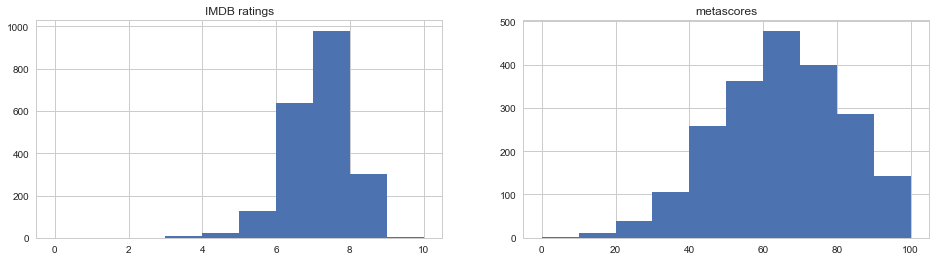

In [62]:
#initialize a figure, to be used for plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(16,4))
#initialize 2 axes, one for each figure/plot
ax1, ax2 = fig.axes

#first axis will be a histogram of imdb_ratings
#bins will be set at 10, and the range will be 10, since IMDB ratings range from 0 to 10
ax1.hist(imdb_data['imdb_rating'], bins=10, range = (0,10))
#Set the title of this particular plot
ax1.set_title('IMDB ratings')

#second axis will be a histogram of metascores
#Range of the bins will be 0 to 100 since metascores use this scale for their ratings
ax2.hist(imdb_data['metascore'], bins=10, range = (0,100))
#set axis title
ax2.set_title('metascores')
         
    
#show plots/figure
plt.show()

The distributions of the 2 variables are actually quite different.

Metascores, for example, appear to be somewhat symmetric. 

By contrast, IMDB ratings show a bias towards higher-end ratings, on average, while also having some fairly notable outliers with low ratings of around 3-5. Even the average of the IMDB ratings, if they were converted to be out of 100, instead of 10, is a bit higher, at approximately 7.5 (75%) instead of about 65 for metascores. 

In addition, the minimum values of IMDB ratings do not reach anything lower than about 3 (30%), whereas some metascores reach as low as 10%. Perhaps somewhat ironically, however, there are very few IMDB ratings higher than 9, even though are some (by no means many) perfect metascore ratings of 100.

Why these discrepancies are present is by no means obvious, but perhaps those who are most incentivized to do ratings on IMDB are those who are actually fans of the films being reviewed. Movie critics, by contrast, need to watch a wide variety of films (it's part of their job to do so), and so they have a much stronger incentive to review films that they may not necessarily be fans of.

A boxplot can convey a clearer picture of the ranges of the data, where the median lies relative to the rest of the data, and which data points appear to be outliers. Therefore, boxplots will now be plotted for both IMDB ratings and metascores.

In [6]:
#multiply the imdb scores by 10 to be more readily comparable with the metascore ratings: i.e., rating metric out of 100
imdb_data['imdb_rating_100'] = imdb_data['imdb_rating'] * 10
imdb_data['imdb_rating_100'].head(10)

0    85.0
1    38.0
2    76.0
3    76.0
4    77.0
5    80.0
6    80.0
7    82.0
8    82.0
9    77.0
Name: imdb_rating_100, dtype: float64

### Boxplots

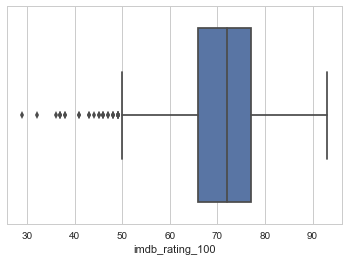

In [38]:
#Show box plots of imdb_ratings and metascores to get a better sense of the range and outliers of the data

#use a white grid in background for these plots
sns.set(style = "whitegrid")

#First plot: boxplot of IMDB ratings, transformed to be out of 100 points possible: i.e., imdb_rating_100
fig_box = sns.boxplot(imdb_data['imdb_rating_100'])

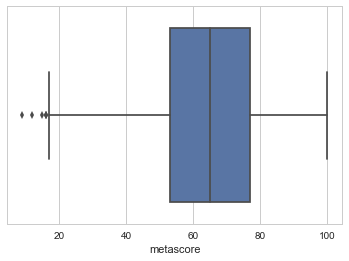

In [39]:
#Now, show boxplot of metascores
fig_box = sns.boxplot(imdb_data['metascore'])

The boxplots provide 2 additional insights, but mostly back up the insights from the histograms. 

1.) The IMDB ratings have many more outliers, including outliers that lie farther away from the median than that of the metascore ratings. 

2.) The range of the data are a bit higher for the metascore ratings, while the median for the IMDB ratings is somewhat higher than for metascores, at about 72 instead of only 65 for metascores.

Overall, then, the boxplots confirm some of the intuition gleaned from the histograms. For example, IMDB ratings are higher, on average, and arguably a bit inflated, relative to metascore ratings. IMDB ratings also tend to have a fairly notable number of ratings on films that users do not care for much at all (i.e., the outliers).

By contrast, metascore ratings are more symmetric and spread-out, indicating an arguably more balanced spectrum of ratings, all the more so since the average ratings are not as high.

Given the presence of outliers in the data, analysis and even visualizations must be done with care. In fact, outliers should probably be deleted from the sample. 

Due to these issues with the data, I will first start with plots and statistics with the entire sample intact. However, I will then proceed to delete the outliers, and compare the results to demonstrate the potential adverse impact and noise (i.e., less precise or accurate) outliers can afflict on a sample.


### More detailed summary stats for IMDB and metascore ratings, and number of IMDB votes

In [7]:
#Calculate various statistics for the numerical variables
#Again, keep all outliers in tact (for now)
#Start with the main variable of interest: imdb_ratings
 
imdb_data['imdb_rating_100'].mean(), imdb_data['imdb_rating_100'].median(), imdb_data['imdb_rating_100'].std()

(71.25432692307692, 72.0, 8.023608175069251)

The average of the imdb ratings is 7.13 (71.3%), and the median is fairly similar, at 7.2. The standard deviation is also not exceptionally high. 

In [3]:
imdb_data['metascore'].mean(), imdb_data['metascore'].median(), imdb_data['metascore'].std()

(64.5576923076923, 65.0, 17.004470975365063)

#### Comparison of IMDB and metascore stats

While the mean and median of the metascore ratings data are also fairly similar to each other, the standard deviation of metascores is quite a bit higher relative to its than that of the IMDB ratings data. Thus, there is a higher amount of dispersion around the mean, giving further credence to the claim that metascore ratings are less heavily represented or skewed in one extreme of ratings (i.e., heavily clustered around high or low ratings). 

In [43]:
#Now statistics for n_votes
imdb_data['n_votes'].mean(), imdb_data['n_votes'].median(), imdb_data['n_votes'].std()

(202546.56634615385, 145042.0, 222939.05707299427)

Notice the average of the number of IMDB votes/ratings is 203,518. However, the data are obviously highly skewed (in stark contrast with the imdb ratings data) since the median is quite a bit smaller, at 145,108, and because the standard deviation exceeds the mean!

## Scatterplots to examine correlations

Film length might also be interesting to examine. For example, are longer films perceived to be of a higher quality, on average?

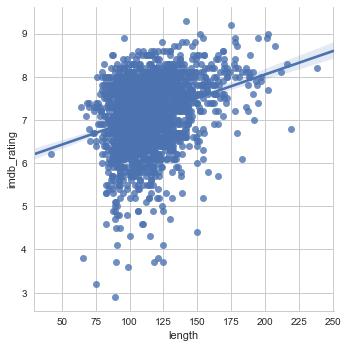

In [47]:
#imlement a scatterplot of film length and imdb_rating
sns.lmplot('length', 'imdb_rating', data=imdb_data)

Notice, relative to the top 200+ rated IMDB films (see other jupyter notebook for more detais), there is a somewhat stronger and more definitive positive corrrelation between film length and IMDB ratings. While the data are by no means conclusive, this relationship perhaps suggests that longer films, on average, are perceived to be of a somewhat higher quality.

Box office data might also be useful in determining the popularity of longer vs shorter films, but box office data are not necessarily as widely available. Thus, including box office data as an additional variable would require the sample size to shrink even more if metascore data were to also be kept as one of the other variables.

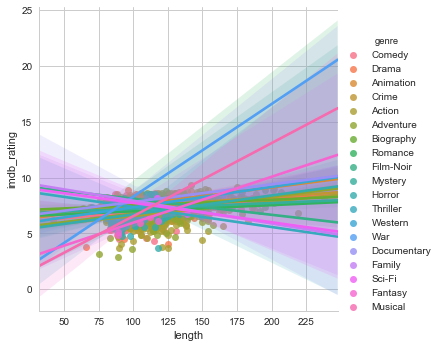

In [49]:
#Show plot of same variables, but now compare the correlations by genre
sns.lmplot('length', 'imdb_rating', data=imdb_data, hue = 'genre')

Just like with the top 200+ films, movie length and imdb ratings tend to vary quite widely by genre. Some genres show a moderate or higher degree of positive corelation between length and imdb rating. Many show little to no correlation as well.

However, several genres actually show a negative correlation between length and imdb ratings. Thus, while film length tends to contribute to higher imdb ratings, this clearly differs for different genres of films.

/Users/kevinallen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


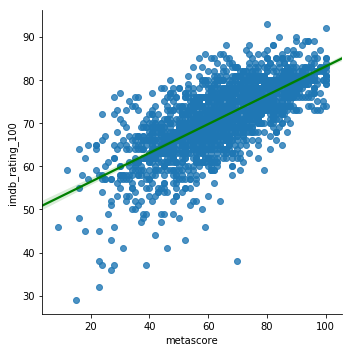

In [8]:
#Show plot comparing metascores and imdb ratings
sns.lmplot(x='metascore', y='imdb_rating_100', data = imdb_data, line_kws={'color':'green'})

Unlike some of the other correlations, the relationship between metascores and imdb ratings stands in much bigger contrast to the correlations for the top 200+ imdb sample. Perhaps critics have been relatively "off-the-mark" so to speak for films that have attained the highest ratings by the general public.

However, for films in general (including poor quality and mediocre films, which are included in this sample), on average, the aggregate of movie critics' reviews tends to follow that of imdb ratings fairly closely. I.e., the average ratings of movie critics as a whole converges fairly closely with that of the general public insofar as imdb ratings can convey these public perceptions.

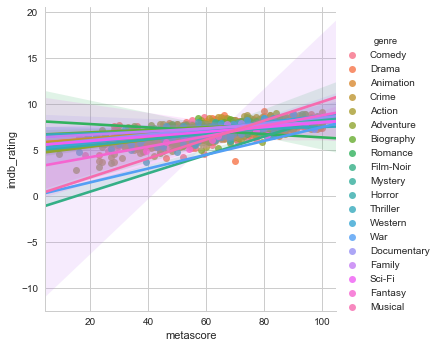

In [52]:
sns.lmplot('metascore', 'imdb_rating', data=imdb_data, hue = 'genre')

Interestingly, unlike for various other correlations, the correlation between metascores and imdb ratings is quite consistent for most genres. Therefore, on average, movie critics' reviews have consistently been relatively well in-line with imdb ratings, regardless of genre.

A jointplot, also implemented via seaborn, can convey a better sense of the overlap in the distributions of 2 different variables, as well as show the pearson correlation coefficient (i.e., "r"). This could provide more precise information as to how strongly of a linear association metascores and IMDB ratings have with one another.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


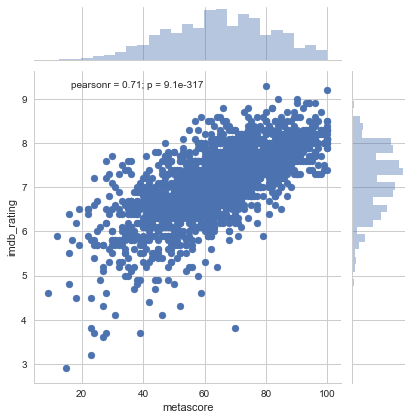

In [53]:
#implement a jointplot of metascores and IMDB ratings, showing a histogram and scatter plot of each variable
sns.jointplot(x='metascore', y='imdb_rating', data = imdb_data)

Notice the r coefficient is suprisingly high, at 71% (not exceptionally high, but higher than one might expect). This indicates a moderately high degree of positive correlation between metascore and IMDB ratings.

Thus, metascores and IMDB ratings are not terribly divergent from one another, although, as shown by the earlier boxplot and histogram figures, the metascors have a more evenly-balanced and symmetric distribution.

Another variable in this dataset is the number of IMDB ratings (the number of ratings constituting each metascore is not available via IMDB).

The correlation between the number of IMDB votegs and IMDB ratings might help convey whether higher-rated films tend to have a larger nunber of votes. I.e., such a plot can help test my claim that IMDB ratings tend to be a bit inflated relative to metascores because IMDB users are more likely to provide ratings for films they enjoy watching.

The next two lines of code will implement first a scatter plot, and then a joint plot, each comparing n_votes with imdb_rating.

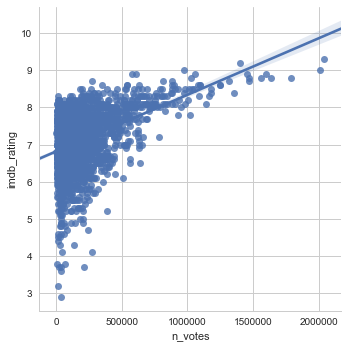

In [54]:
#Show a scatterplot of the number of IMDB votes and the imdb ratings
sns.lmplot('n_votes', 'imdb_rating', data=imdb_data)

As the plots show, there is a moderate positive correlation (with a pearson correlaiton coefficient of 43%) between the number of IMDB votes and IMDB ratings.

More tellingly, very high IMDB ratings, of around 8.9 to greater than 9, tend to have a very high number of IMDB votes/ratings. Thus, IMDB users appear to be somewhat more likely to rate a film on IMDB, especially for films they greatly enjoy watching.

Now, the code will implement a 3D plot to look at the combined correlations of 2 of the RHS variables--film length and the number of IMDB votes--with respect to IMDB ratings, in a single figure.

That is, this plot will help show whether there is a correlation among the 3 variables of the number of IMDB votes, film length, and of course IMDB ratings.

In [85]:
#initialize a figure
#Set figure's dimensions as 20x8
fig2 = plt.figure(figsize=(20, 8))

<Figure size 1440x576 with 0 Axes>

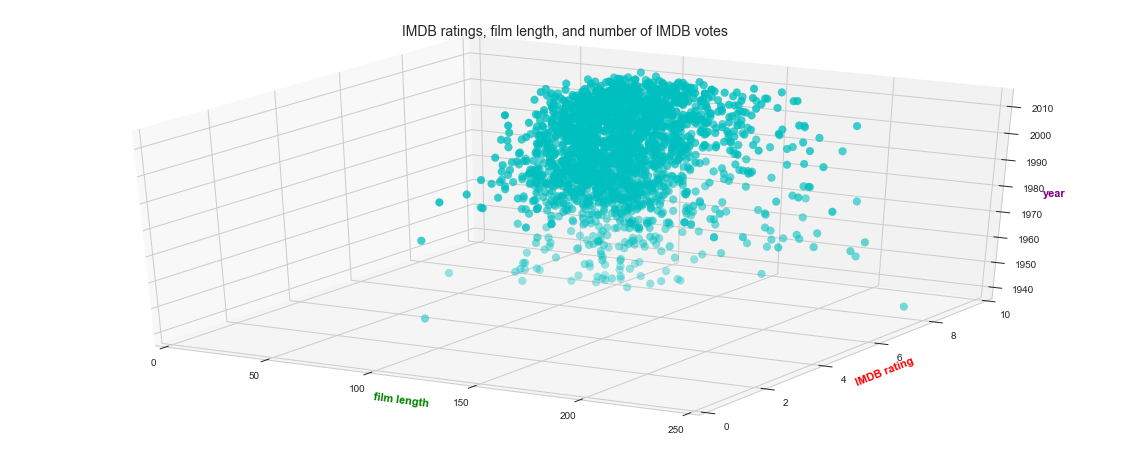

In [86]:
#set a 3D projection onto the plot so it cn be implemented in 3 dimensions 


ax2 = fig2.add_subplot(111, projection = '3d')

#Assign the data that will be used for the scatterplot: i.e., for the x, y, and z axes
#Also, set the color to 'c', i.e., cyan
ax2.scatter(imdb_data['length'],imdb_data['imdb_rating'], imdb_data['year'], c='c', s=60)

#Set axis labels/titles
#set x axis label, and set the font to bold, with a size of 8 and green color
ax2.set_xlabel('film length', fontsize=11, fontweight='bold', color='g')
#set y axis label, use same font, but different color
ax2.set_ylabel('IMDB rating', fontsize=11, fontweight='bold', color='r')
#set z axis label, use same font, but different color
ax2.set_zlabel('year', fontsize=11, fontweight= 'bold', color='purple')

#Set title of figure/plot
ax2.set_title('IMDB ratings, film length, and number of IMDB votes', fontsize=14)

#set the lower and upper boundaries for each axis
ax2.set_xlim(0, 250)
ax2.set_ylim(0, 10)
ax2.set_zlim(1937, 2015)

fig2

In [87]:
#show same plot, but with different rotation/view angle
fig2r = plt.figure(figsize=(20, 8))

<Figure size 1440x576 with 0 Axes>

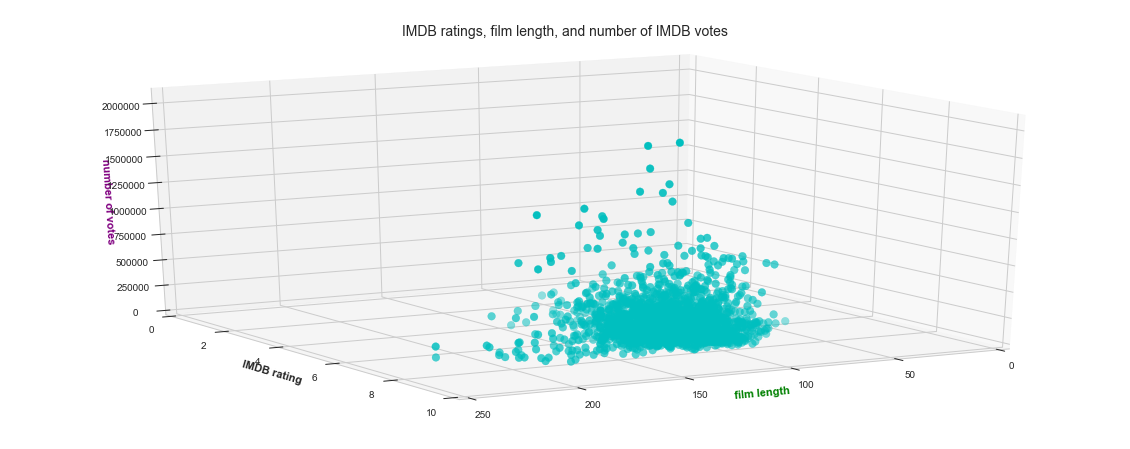

In [88]:
#set a 3D projection onto the plot so it cn be implemented in 3 dimensions 
ax2r = fig2r.add_subplot(111, projection = '3d')

#Assign the data that will be used for the scatterplot: i.e., for the x, y, and z axes
#Also, set the color to 'c', i.e., cyan
ax2r.scatter(imdb_data['length'],imdb_data['imdb_rating'], imdb_data['n_votes'], c='c', s=60)

#Set axis labels/titles
#set x axis label, and set the font to bold, with a size of 8 and green color
ax2r.set_xlabel('film length', fontsize=11, fontweight='bold', color='g')
#set y axis label, use same font, but different color
ax2r.set_ylabel('IMDB rating', fontsize=11, fontweight='bold')
#set z axis label, use same font, but different color
ax2r.set_zlabel('number of votes', fontsize=11, fontweight= 'bold', color='purple')

#Set title of figure/plot
ax2r.set_title('IMDB ratings, film length, and number of IMDB votes', fontsize=14)

#set the lower and upper boundaries for each axis
ax2r.set_xlim(0, 250)
ax2r.set_ylim(0, 10)
ax2r.set_zlim(0, 2100000)

#change the elevation and azimuth angles, via the view_init() function
#this rotation will flip the z and x axes to be on the opposite sides compared to their normal locations
ax2r.view_init(20,60)

#show the plot with this different rotation/view angle
fig2r

Given the considerable time span of these IMDB data, one might wonder:

1.) Have the films changed in terms of length? For example, anecdotally many long films (let's arbitraily define this as longer than 2.5 hours) from the 1930s to 1960s can be brought to mind to movie buffs: Lawrence of Arabia; Mr Smith Goes to Washington; Sparticus; Ben Hur; etc.

2.) Has the perceived quality of films (as judged by IMDB ratings or by metascores) changed for newer films as compared with older films from the 1930s to 1970s?

3.) Are IMDB ratings or metascores more different from one another with respect to films from particular periods?

Various plots can help bring light to this. Scatterplots are usable for examining data over time, but lineplots can show trends more effectively and with less messiness, especially for large samples. Comparisons during different time periods are also more readily apparent. 

Let's start with a scatter plot of film length over time, then compare this with a line plot. 

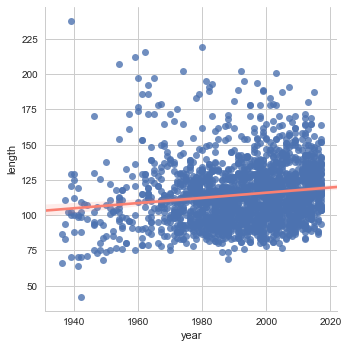

In [67]:
#scatter plot of film length over time
#given the dense clusters of data, change the plot's line color as well, using a dictionary
sns.lmplot('year', 'length', data=imdb_data, line_kws = {'color':'salmon'})

/Users/kevinallen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


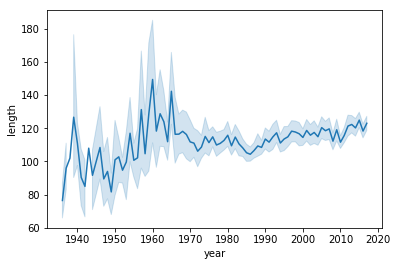

In [2]:
sns.lineplot('year', 'length', data=imdb_data)

Contrary to my expectations, the plot shows a slight positive trend over time, indicating that films have become slightly longer over time, on average. 

However, films from the 1960s in particular have some notably long films, with around 10+ films lasting around 170+ minutes. 

This is especially noticeable in the line plot, which shows that film lengths, on average, actually peaked in the early to mid 1960s, and decreased by a substantial 20+ minutes during the late 1960s. This 110-120 minute average length has remained fairly steady to the most recent year (2017) of the sample)

Overall, however, the length of films in general has increased a bit relative to the earlier periods in the sample, namely the late 1930s to late 1950s. 

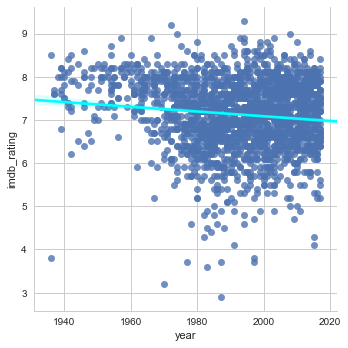

In [68]:
#plot of film length over time
#given the dense clusters of data, change the plot's line color as well, using a dictionary
#for all color options via matplotlib, see this URL for documentation: https://matplotlib.org/examples/color/named_colors.html
sns.lmplot('year', 'imdb_rating', data=imdb_data, line_kws = {'color':'cyan'})

Interestingly, there is a slight negative trend over time between imdb ratings and the year a given film was released.

Films from the late 1930s through the 1950s show no IMDB ratings below 6, and even films in the 1960s rated at 5 or higher. However, starting in the 1970s, several IMDB ratings have been as low as 3 to 4, with one in the late 1980s a mere 3.2.

While this may be a genuine reflection of user ratings on the quality of films from the 1980s to the present, this analysis is at best very limited and statisticaly biased, given that the sample for the 1930s and 1940s films is so small (i.e., sample selection bias is likely a signficant issue here). The reason for the sample being so lop-sided is that any film on the database without a Metascore was excluded from the sample. Given the relative obscurity of most films from the 1930s and 1940s, many have likely not been reviewed by critics since the advent of the internet, hence Metascores are sorely lacking for most of the films from this era.

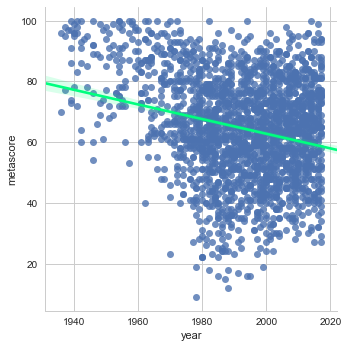

In [69]:
#plot of metascores 
#given the dense clusters of data, change the plot's line color
sns.lmplot('year', 'metascore', data=imdb_data, line_kws = {'color':'springgreen'})

this plot shows more clear evidence of the perceived quality of films being in a moderate decline from the late 1930s to the 2010s.

While the correlation is not substantial, the negative trend over time is definitely more noticeable and substantial for metascore ratings. For example, many films in the 1980s to the present have scored an at-best less than mediocre (or worse) rating of 50 or lower. However, there appears to be a slight up-tick from the late 1990s to the 2010s, with slightly fewer films rated below 30.

By contrast, low ratings of 50 or lower were fairly rare for films before the 1970s, and not as common in the 1970s either.

Therefore, the plot suggests films have diminished in quality somewhat, on average, over time. Again, however, just like with the other plot over time, sample selection bias is likely a signficant issue since so many more films are in the dataset for the era of the mid-to-late 1970s to the present compared with the 1930s to early 1970s.